# Assignment
### Objective
**Apply computer vision techniques to derive valuable insights from a video capturing a man engaged in basketball dribbling.**
#### Analysis Targets
* Determine the total count of dribbles executed by the player.
* Identify and quantify the number of dribbles performed by each hand individually.
* Keep a record of the number of times the ball transitions between the player's hands during the dribbling sequence.

## Fetching Dataset
**Note:** *The video is annoted using roboflow used for training and validation*

In [1]:
from roboflow import Roboflow

rf = Roboflow(api_key={'hidden'})
project = rf.workspace("ball-heneq").project("ball-syndf")
dataset = project.version(3).download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ball-3 in yolov8-obb:: 100%|██████████| 321/321 [00:00<00:00, 2754.44it/s]


**Dataset is featched and Kept in Dataset folder**

The dataset includes 156 images.

**Ball**, **Floor**, **Left_Hand**, **Right_Hand** are annotated in YOLOv8 Oriented Object Detection format.

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 640x640 (Fit (white edges))
* Grayscale (CRT phosphor)

The following augmentation was applied to create 3 versions of each source image:
* Random rotation of between -15 and +15 degrees
* Random shear of between -15° to +15° horizontally and -15° to +15° vertically
* Random Gaussian blur of between 0 and 4.9 pixels
* Salt and pepper noise was applied to 1.96 percent of pixels
___

## Trainnig YoloV8 with this dataset

In [2]:
from ultralytics import YOLO
# Initialize a model
m = YOLO('yolov8m.pt')
# Train the model on dataset
model= m.train(data=r"C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\data.yaml", epochs=20)

Ultralytics YOLOv8.1.15 🚀 Python-3.11.5 torch-2.2.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

train: Scanning C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\train\labels... 138 images, 0 backgrounds, 0 corrupt: 100%|██████████| 138/138 [00:00<00:00, 467.12it/s]

train: WARNING ⚠️ C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\train\images\WHATSAAP-ASSIGNMENT_mp4-0005_jpg.rf.3f3a84e619158e50ba21ac068c0b70b0.jpg: 1 duplicate labels removed
train: WARNING ⚠️ C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\train\images\WHATSAAP-ASSIGNMENT_mp4-0005_jpg.rf.64b30082e0c1ec47b2cdb17d9b1438a4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\train\images\WHATSAAP-ASSIGNMENT_mp4-0005_jpg.rf.ea2d92886ddcd5c1000824af94b15a05.jpg: 1 duplicate labels removed
train: WARNING ⚠️ C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\train\images\WHATSAAP-ASSIGNMENT_mp4-0013_jpg.rf.5ce97c46c4687a059b188158aff628d0.jpg: 1 duplicate labels removed
train: WARNING ⚠️ C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\train\images\WHATSAAP-ASSIGNMENT_mp4-0013_jpg.rf.dcbe32ef27cb2d8efd7225003


val: Scanning C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\valid\labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 518.07it/s]

val: WARNING ⚠️ C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\valid\images\WHATSAAP-ASSIGNMENT_mp4-0003_jpg.rf.755336975003f29e6cc9482798b437b6.jpg: 1 duplicate labels removed
val: New cache created: C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\valid\labels.cache


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.531      2.875      1.523         61        640: 100%|██████████| 9/9 [04:28<00:00, 29.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.900s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.32s/it]

                   all         18         77      0.824      0.507       0.54      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.393      1.363      1.336         79        640: 100%|██████████| 9/9 [03:52<00:00, 25.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.50s/it]

                   all         18         77      0.825       0.85      0.852      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.352      1.126      1.311         86        640: 100%|██████████| 9/9 [03:51<00:00, 25.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.37s/it]

                   all         18         77      0.705      0.842       0.89      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.354      1.085      1.331         95        640: 100%|██████████| 9/9 [03:51<00:00, 25.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.73s/it]

                   all         18         77      0.668      0.936      0.932      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.304     0.9677      1.288         93        640: 100%|██████████| 9/9 [03:50<00:00, 25.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.93s/it]

                   all         18         77      0.575      0.901      0.905      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.343     0.9509      1.291         65        640: 100%|██████████| 9/9 [03:50<00:00, 25.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.62s/it]

                   all         18         77      0.621      0.924      0.867       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G        1.3      0.844      1.272         82        640: 100%|██████████| 9/9 [03:47<00:00, 25.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.64s/it]

                   all         18         77      0.784      0.889       0.89      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.277     0.7764      1.246         76        640: 100%|██████████| 9/9 [03:51<00:00, 25.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.55s/it]

                   all         18         77      0.822      0.848      0.898      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.302     0.8179      1.267         80        640: 100%|██████████| 9/9 [03:48<00:00, 25.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.07s/it]

                   all         18         77      0.675      0.848      0.898      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.216     0.7458      1.251         66        640: 100%|██████████| 9/9 [03:45<00:00, 25.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.63s/it]

                   all         18         77      0.823       0.85        0.9      0.603


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.298     0.8218      1.378         46        640: 100%|██████████| 9/9 [03:41<00:00, 24.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.91s/it]

                   all         18         77      0.794      0.851      0.913       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.262     0.8319      1.377         47        640: 100%|██████████| 9/9 [03:42<00:00, 24.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.83s/it]

                   all         18         77      0.796      0.932      0.959      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.245     0.7822      1.421         50        640: 100%|██████████| 9/9 [03:46<00:00, 25.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.62s/it]

                   all         18         77      0.891      0.907      0.954      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G       1.18     0.7268      1.348         46        640: 100%|██████████| 9/9 [03:43<00:00, 24.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.59s/it]

                   all         18         77      0.884      0.955       0.95      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.197     0.7329       1.37         43        640: 100%|██████████| 9/9 [03:47<00:00, 25.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.57s/it]

                   all         18         77      0.949      0.954      0.961      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.144     0.6788      1.282         45        640: 100%|██████████| 9/9 [03:48<00:00, 25.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.31s/it]

                   all         18         77      0.912      0.943      0.949      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.136     0.6382      1.298         44        640: 100%|██████████| 9/9 [03:41<00:00, 24.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.24s/it]

                   all         18         77      0.912      0.964      0.951      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.128      0.618      1.276         45        640: 100%|██████████| 9/9 [03:45<00:00, 25.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.11s/it]

                   all         18         77      0.935      0.959      0.962       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.061     0.6034      1.253         44        640: 100%|██████████| 9/9 [03:36<00:00, 24.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.12s/it]

                   all         18         77      0.937      0.943      0.967      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.065     0.5832      1.248         47        640: 100%|██████████| 9/9 [03:43<00:00, 24.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.30s/it]

                   all         18         77       0.91      0.953      0.957      0.704



20 epochs completed in 1.336 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 52.0MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.1.15 🚀 Python-3.11.5 torch-2.2.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.31s/it]


                   all         18         77      0.936      0.943      0.967       0.71
                  ball         18         18      0.979          1      0.995      0.635
                 floor         18         18      0.975          1      0.995      0.951
             left_hand         18         23      0.819      0.826      0.918      0.577
            right_hand         18         18      0.971      0.944      0.961      0.677
Speed: 3.9ms preprocess, 450.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train2


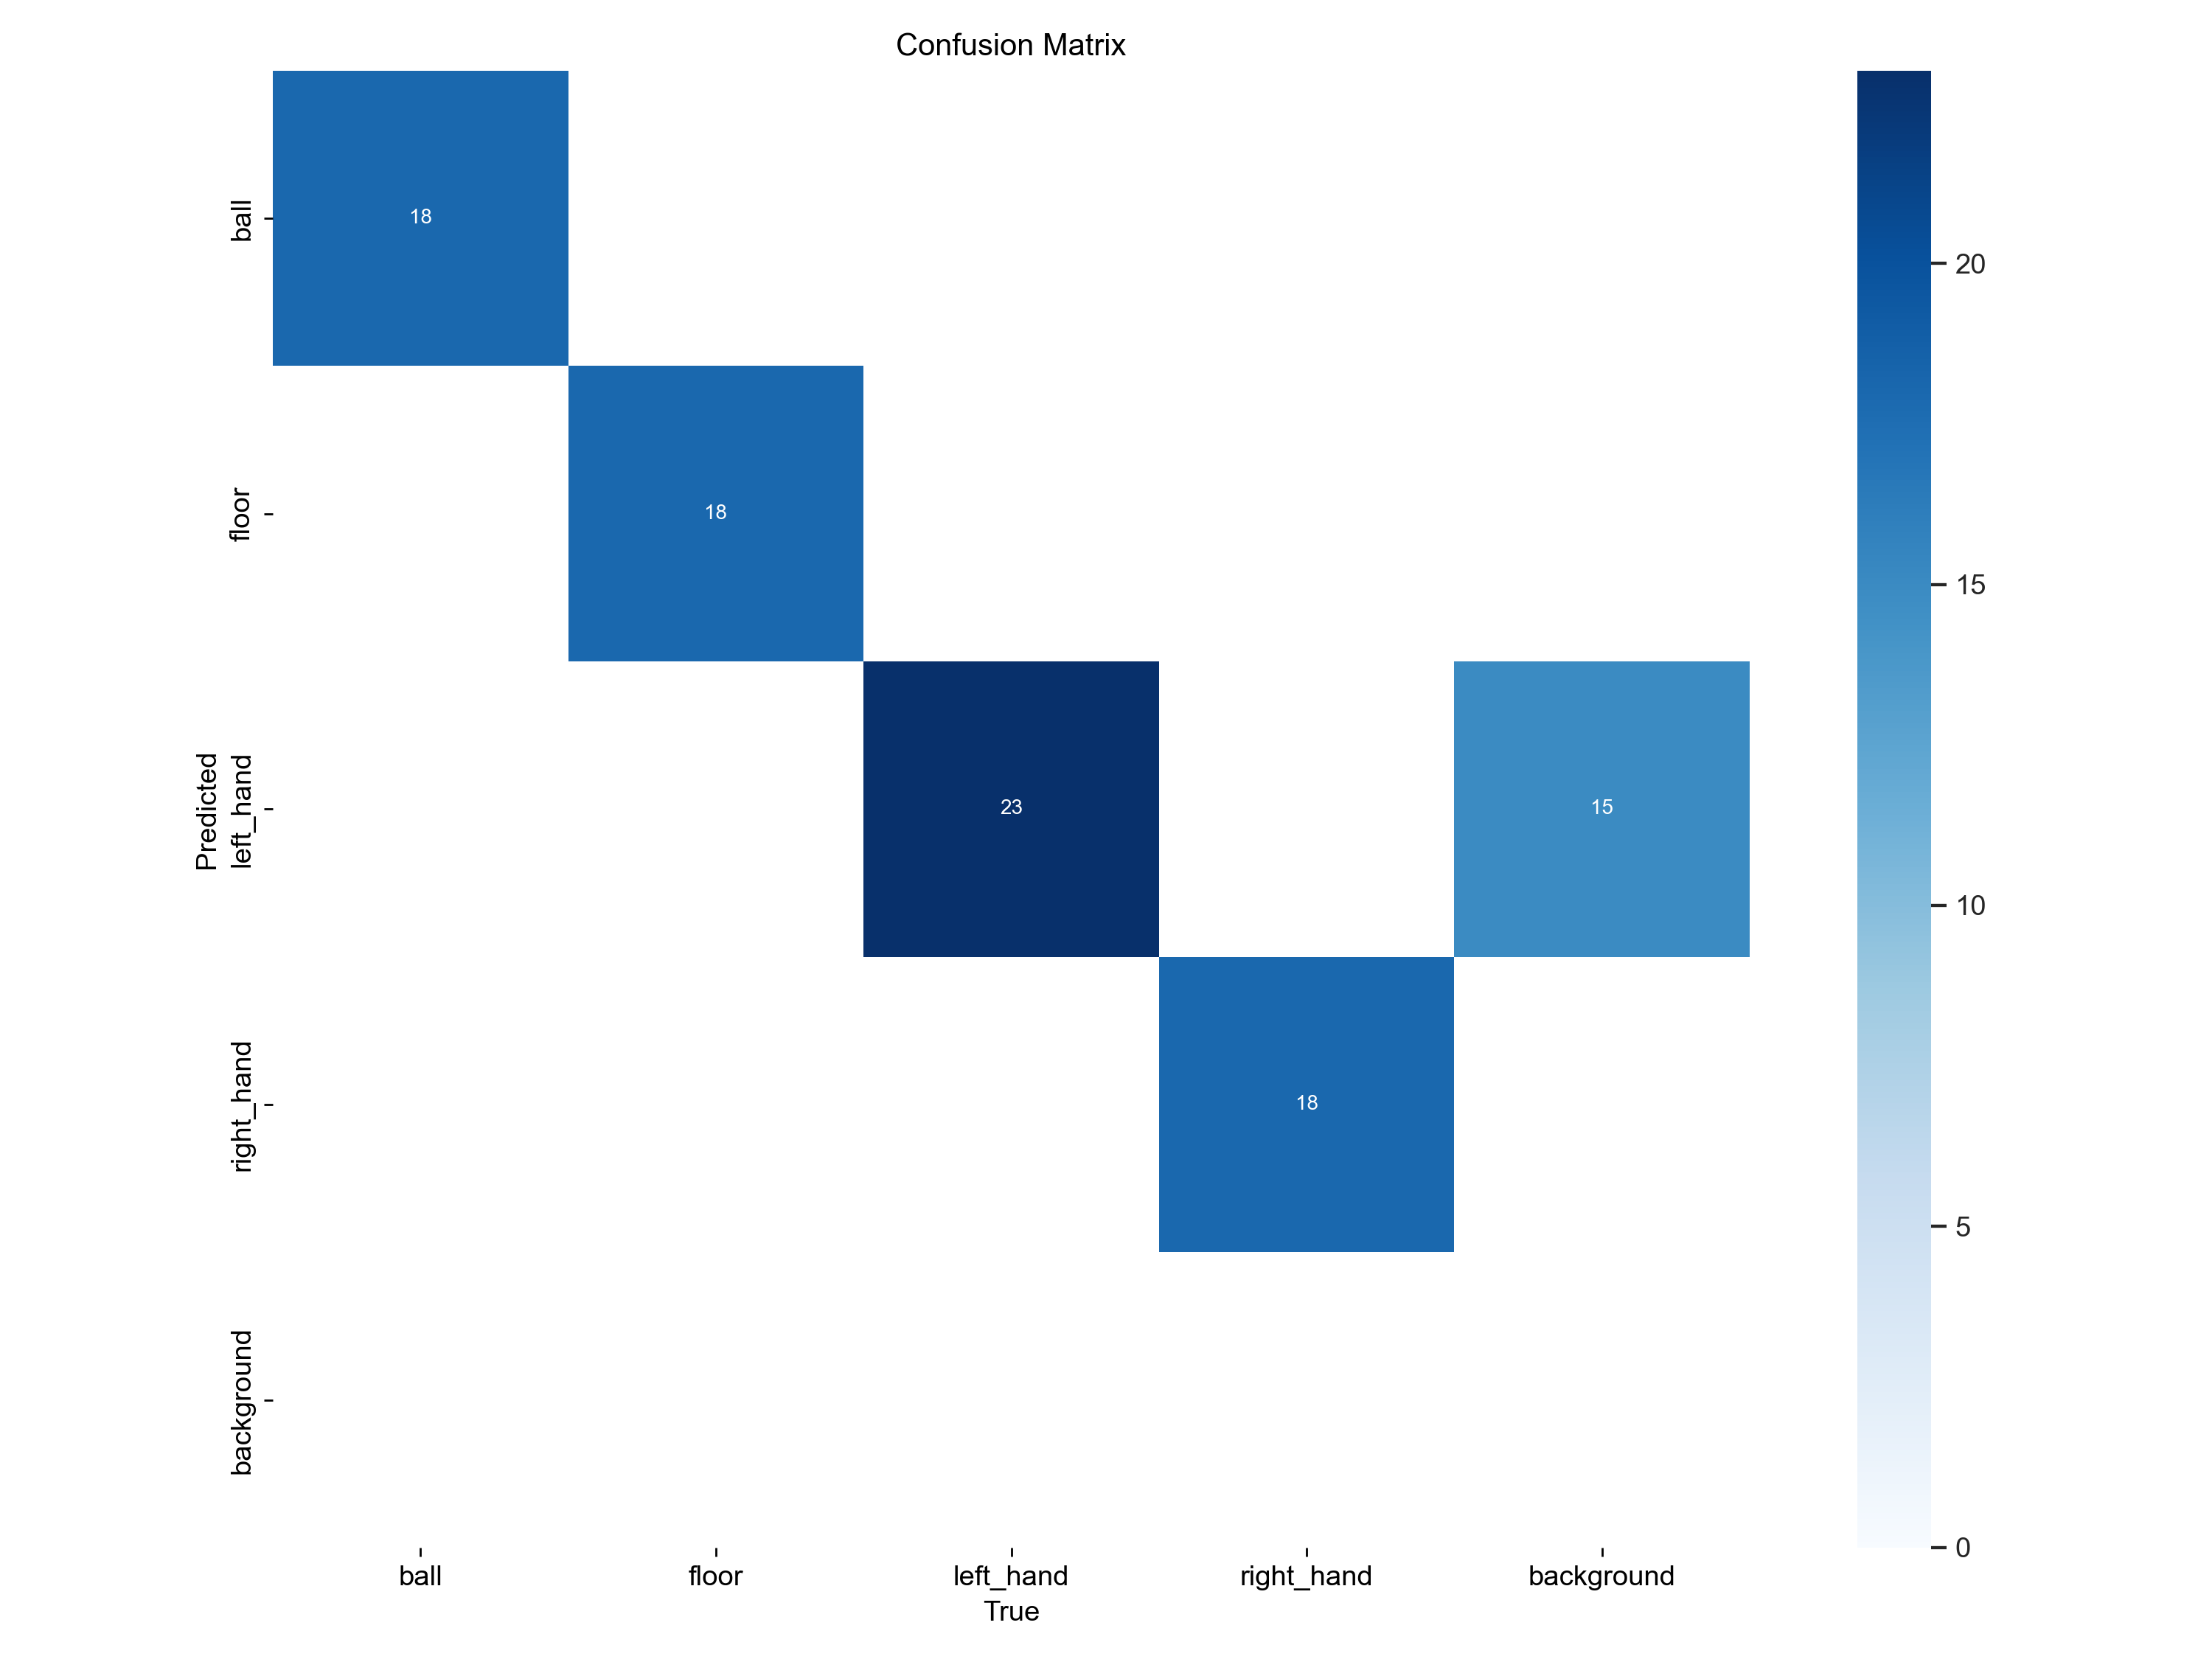

In [4]:
from IPython.display import Image
image_path = r'C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\runs\detect\train2\confusion_matrix.png'
Image(filename=image_path)


*We can see the confusion matrix*

But we can clear see the MAP which tells a better score:
*   Class-------MAP Score
*   all---------0.967
*   ball--------0.995
*   floor-------0.995
*   left_hand---0.918
*   right_hand--0.944

**Validation**
let us check the validation scores

In [4]:
model = YOLO(r'C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\runs\detect\train2\weights\best.pt')
metrics = model.val()

Ultralytics YOLOv8.1.15 🚀 Python-3.11.5 torch-2.2.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\valid\labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]

val: WARNING ⚠️ C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\Dataset\valid\images\WHATSAAP-ASSIGNMENT_mp4-0003_jpg.rf.755336975003f29e6cc9482798b437b6.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.24s/it]


                   all         18         77      0.936      0.943      0.967       0.71
                  ball         18         18      0.979          1      0.995      0.635
                 floor         18         18      0.975          1      0.995      0.951
             left_hand         18         23      0.819      0.826      0.918      0.577
            right_hand         18         18      0.971      0.944      0.961      0.677
Speed: 4.5ms preprocess, 455.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\val


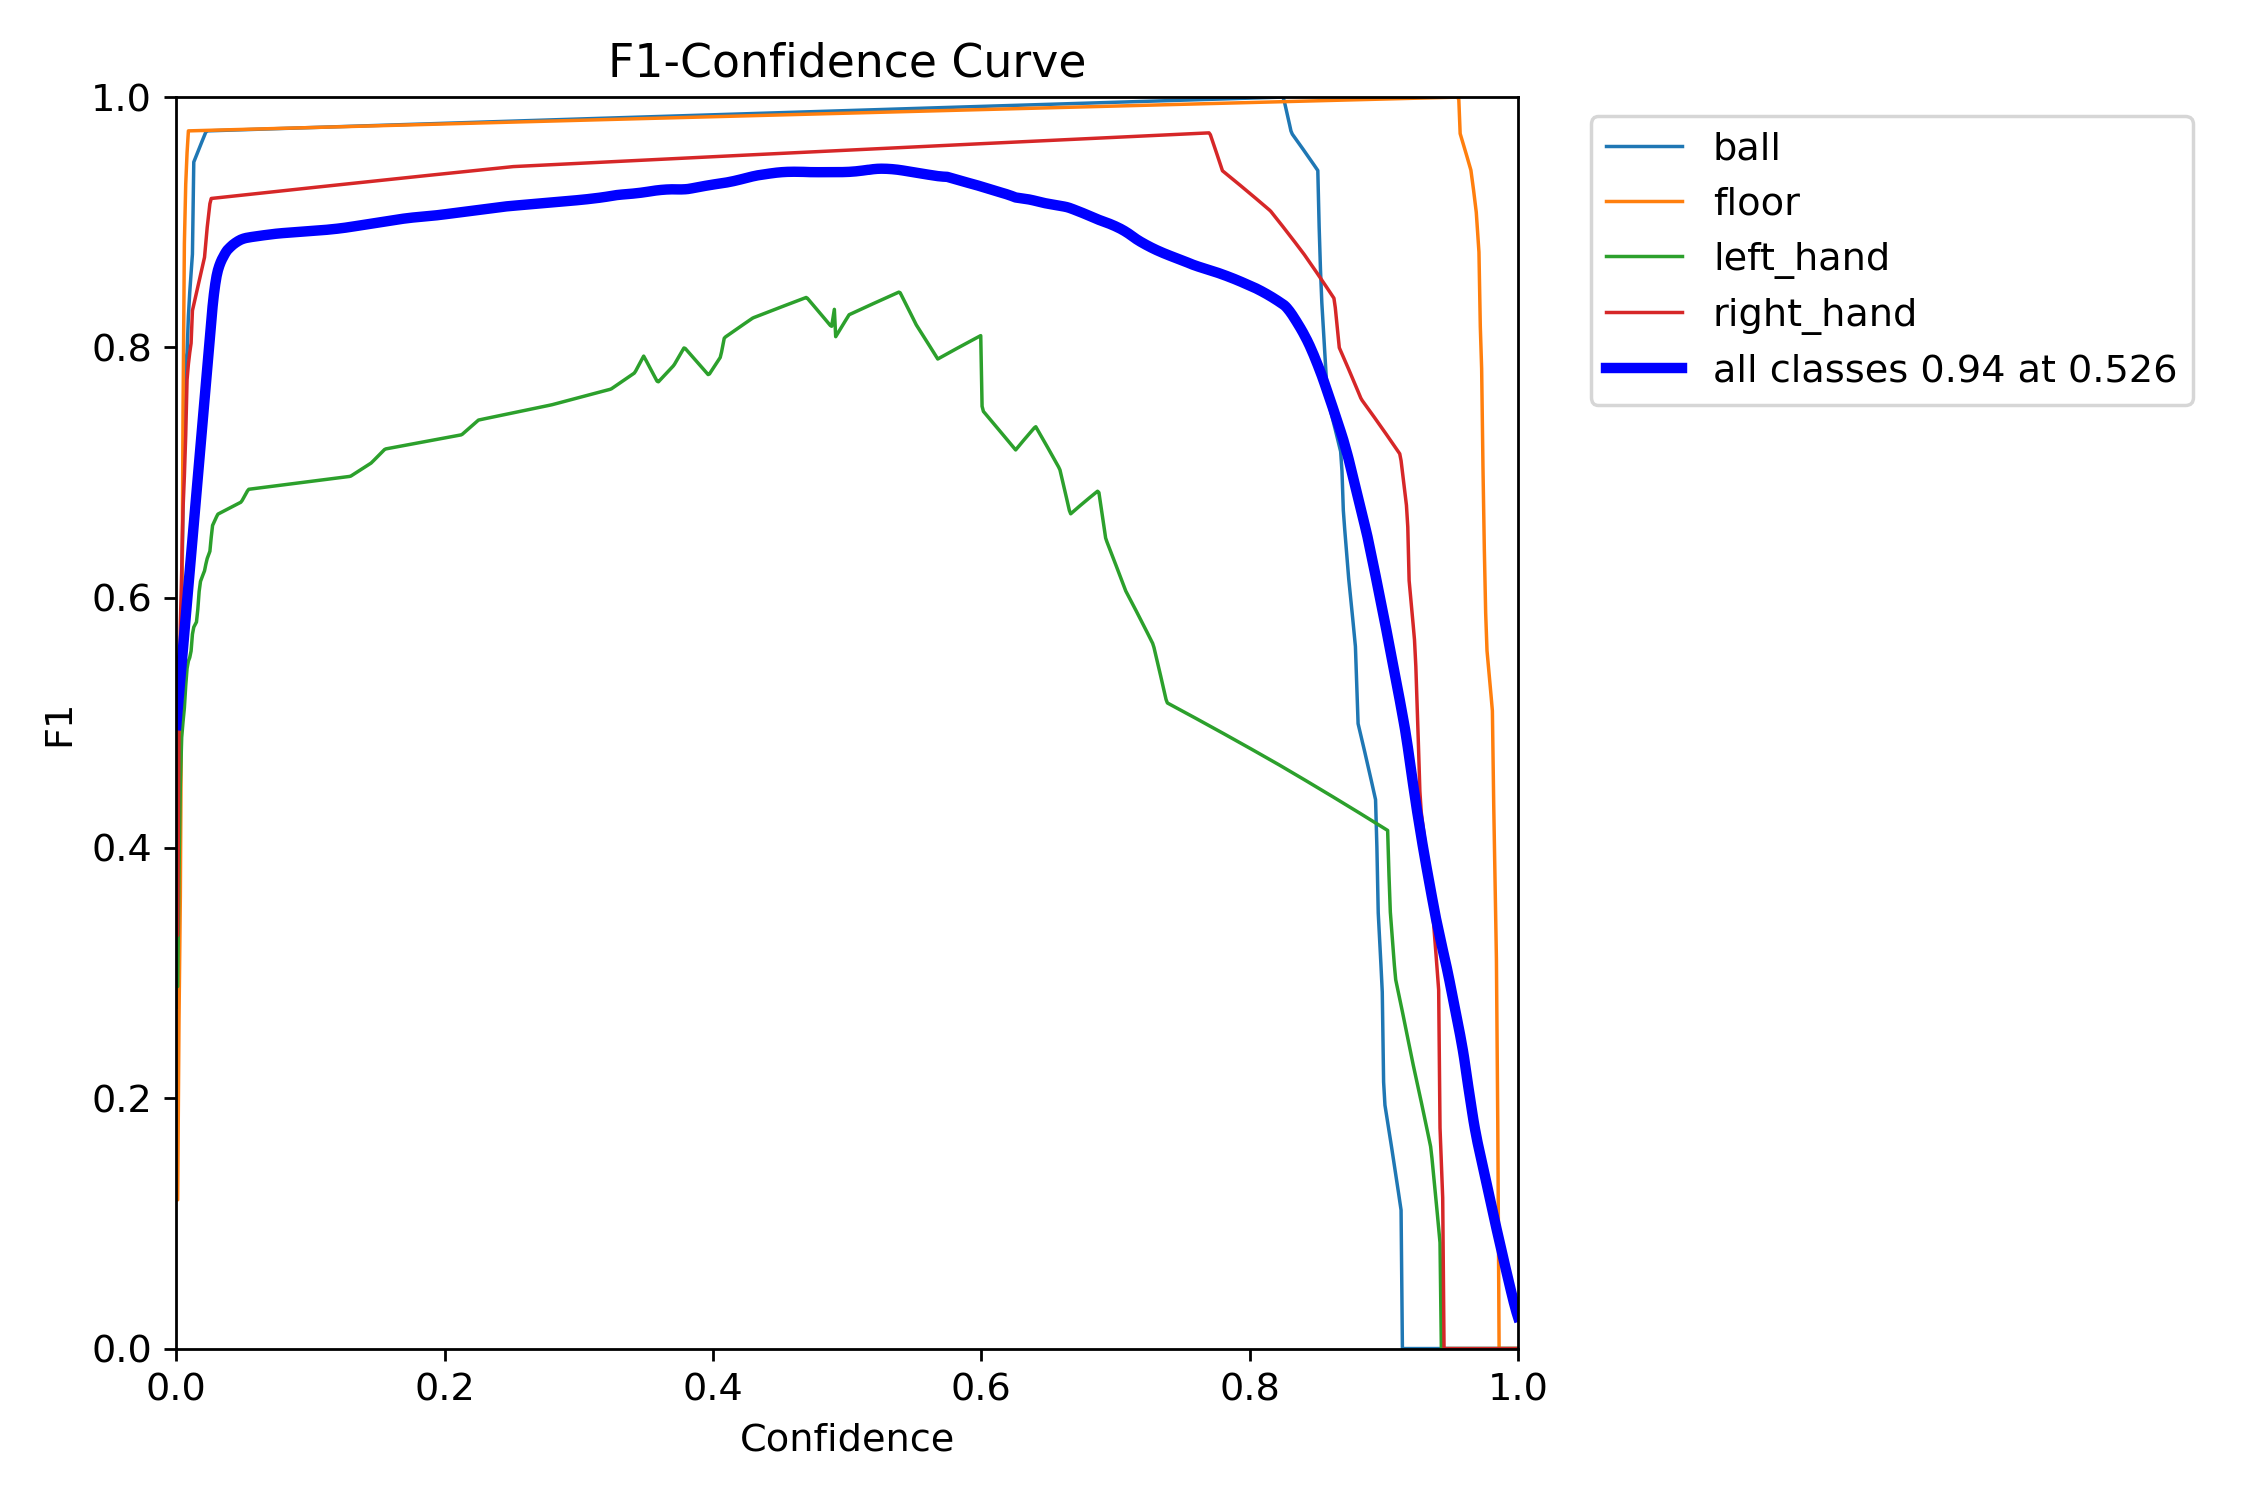

In [5]:
image_path = r'C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\runs\detect\val\F1_curve.png'
Image(filename=image_path)

*We can see the F1 Scores*

But we can clear see the MAP which tells a better score:
*   Class-------MAP Score
*   all---------0.967 
*   ball--------0.995
*   floor-------0.995
*   left_hand---0.918
*   right_hand--0.961 

** MAP clealy shows that our training and validation is almost similar.**
___

### Prediction on Our Video

In [15]:
mo = YOLO(r"C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\runs\detect\train2\weights\best.pt")
model = mo.predict(conf=0.5, source="WHATSAAP ASSIGNMENT.mp4", save_txt=True, save_frames=True, save=True) 



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1520) c:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\WHATSAAP ASSIGNMENT.mp4: 640x384 1 ball, 1 floor, 1 left_hand, 1 right_hand, 338.1ms
video 1/1 (2/1520) c:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\WHATSAAP ASSIGNMENT.mp4: 640x384 1 ball, 1 floor, 1 left_hand, 304.2ms
video 1/1 (3/1520) c:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\WHATSAAP ASSIGNMENT.mp4: 640x384 1 ball

* **Results saved** to *runs\detect\predict*
* **1520 labels saved** to *runs\detect\predict\labels*
___

## Analysis

In [6]:
# For getting coordinates from txt file to data frame
import os
import pandas as pd

def process_txt_file(file_path): # Process a single txt file and extract relevant information.
    with open(file_path, 'r') as file:
        lines = file.readlines()

    frame_data = {'ball': None, 'floor': None, 'left_hand': None, 'right_hand': None}

    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())

        class_name = {0: 'ball', 1: 'floor', 2: 'left_hand', 3: 'right_hand'}[int(class_id)]
        
        if frame_data[class_name] is None or y_center < frame_data[class_name]['y_center']:
            frame_data[class_name] = {'x_center': x_center, 'y_center': y_center, 'width': width, 'height': height}

    return {'': frame_data}

# Folder containing .txt files
folder_path = r'C:\Users\p12m9\Documents\Python Coding\Job Assignment\Dribble_count\runs\detect\predict\labels'

# List to store individual JSON-like structures
json_data_list = []

# Process each txt file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        
        # Call the process_txt_file function inside the loop
        json_data = process_txt_file(file_path)
        
        json_data_list.append(json_data)

# Convert the list of JSON-like structures to a DataFrame
result_df = pd.json_normalize(json_data_list, sep='_').fillna(0)
result_df.head()

C:\Users\p12m9\AppData\Local\Temp\ipykernel_6888\3483170344.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,ball_x_center,ball_y_center,ball_width,ball_height,floor_x_center,floor_y_center,floor_width,floor_height,left_hand_x_center,left_hand_y_center,left_hand_width,left_hand_height,right_hand_x_center,right_hand_y_center,right_hand_width,right_hand_height,right_hand,left_hand,ball
0,0.442921,0.285852,0.169457,0.108128,0.499229,0.749578,0.994367,0.493519,0.716322,0.356533,0.076623,0.173811,0.397323,0.269366,0.127946,0.085048,0.0,0.0,0.0
1,0.403791,0.610226,0.151086,0.081432,0.501434,0.755044,0.997133,0.489300,0.702659,0.360126,0.080331,0.163907,0.392749,0.338181,0.119703,0.131520,0.0,0.0,0.0
2,0.349711,0.434797,0.159360,0.107478,0.499279,0.767177,0.992158,0.465645,0.618353,0.399533,0.068880,0.160369,0.322341,0.350633,0.094901,0.091988,0.0,0.0,0.0
3,0.326947,0.549789,0.178703,0.103735,0.497521,0.879356,0.995042,0.235623,0.611666,0.525535,0.079977,0.097419,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.325158,0.524627,0.181123,0.108207,0.497607,0.879687,0.995215,0.235055,0.613934,0.557322,0.085327,0.155307,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [7]:
# Drop unwanted columns
df = result_df.drop(columns=['right_hand', 'left_hand', 'ball'])
df.head()

,ball_x_center,ball_y_center,ball_width,ball_height,floor_x_center,floor_y_center,floor_width,floor_height,left_hand_x_center,left_hand_y_center,left_hand_width,left_hand_height,right_hand_x_center,right_hand_y_center,right_hand_width,right_hand_height
0,0.442921,0.285852,0.169457,0.108128,0.499229,0.749578,0.994367,0.493519,0.716322,0.356533,0.076623,0.173811,0.397323,0.269366,0.127946,0.085048
1,0.403791,0.610226,0.151086,0.081432,0.501434,0.755044,0.997133,0.489300,0.702659,0.360126,0.080331,0.163907,0.392749,0.338181,0.119703,0.131520
2,0.349711,0.434797,0.159360,0.107478,0.499279,0.767177,0.992158,0.465645,0.618353,0.399533,0.068880,0.160369,0.322341,0.350633,0.094901,0.091988
3,0.326947,0.549789,0.178703,0.103735,0.497521,0.879356,0.995042,0.235623,0.611666,0.525535,0.079977,0.097419,0.000000,0.000000,0.000000,0.000000
4,0.325158,0.524627,0.181123,0.108207,0.497607,0.879687,0.995215,0.235055,0.613934,0.557322,0.085327,0.155307,0.000000,0.000000,0.000000,0.000000


**Now we calculate the distance between 2 points and get thr desired result in .txt file as well**

In [8]:
# Function to calculate distance between two points
def calculate_distance(x1, y1, x2, y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

# Calculate distances and identify events
df['distance1'] = df.apply(lambda row: calculate_distance(row['ball_x_center'], row['ball_y_center'], row['floor_x_center'], row['floor_y_center']), axis=1)
df['distance2_left_hand'] = df.apply(lambda row: calculate_distance(row['ball_x_center'], row['ball_y_center'] + row['ball_height']/2, row['left_hand_x_center'], row['left_hand_y_center'] - row['left_hand_height']/2), axis=1)
df['distance2_right_hand'] = df.apply(lambda row: calculate_distance(row['ball_x_center'], row['ball_y_center'] + row['ball_height']/2, row['right_hand_x_center'], row['right_hand_y_center'] - row['right_hand_height']/2), axis=1)
df.head(20)

,ball_x_center,ball_y_center,ball_width,ball_height,floor_x_center,floor_y_center,floor_width,floor_height,left_hand_x_center,left_hand_y_center,left_hand_width,left_hand_height,right_hand_x_center,right_hand_y_center,right_hand_width,right_hand_height,distance1,distance2_left_hand,distance2_right_hand
0,0.442921,0.285852,0.169457,0.108128,0.499229,0.749578,0.994367,0.493519,0.716322,0.356533,0.076623,0.173811,0.397323,0.269366,0.127946,0.085048,0.467132,0.282292,0.121922
1,0.403791,0.610226,0.151086,0.081432,0.501434,0.755044,0.997133,0.489300,0.702659,0.360126,0.080331,0.163907,0.392749,0.338181,0.119703,0.131520,0.174661,0.477786,0.378682
2,0.349711,0.434797,0.159360,0.107478,0.499279,0.767177,0.992158,0.465645,0.618353,0.399533,0.068880,0.160369,0.322341,0.350633,0.094901,0.091988,0.364482,0.317479,0.185923
3,0.326947,0.549789,0.178703,0.103735,0.497521,0.879356,0.995042,0.235623,0.611666,0.525535,0.079977,0.097419,0.000000,0.000000,0.000000,0.000000,0.371093,0.310882,0.684752
4,0.325158,0.524627,0.181123,0.108207,0.497607,0.879687,0.995215,0.235055,0.613934,0.557322,0.085327,0.155307,0.000000,0.000000,0.000000,0.000000,0.394723,0.305295,0.663820
5,0.323684,0.518315,0.189930,0.112038,0.497384,0.879822,0.994769,0.234816,0.614279,0.554551,0.090774,0.156320,0.314415,0.471960,0.087723,0.015734,0.401072,0.306657,0.110630
6,0.317302,0.520975,0.182758,0.109432,0.497195,0.880153,0.994390,0.234211,0.615679,0.558974,0.090707,0.154157,0.310809,0.472908,0.077694,0.015212,0.401709,0.312772,0.110580
7,0.320766,0.545892,0.173249,0.107773,0.497308,0.880216,0.994616,0.234185,0.615581,0.559148,0.091488,0.153977,0.319982,0.490314,0.078555,0.027477,0.378074,0.317412,0.123206
8,0.320846,0.589309,0.163217,0.111071,0.497328,0.880111,0.994655,0.234467,0.616058,0.557090,0.099064,0.156400,0.313002,0.509715,0.079855,0.065998,0.340164,0.338661,0.168311
9,0.323358,0.650006,0.161664,0.115344,0.497378,0.880065,0.994757,0.234605,0.615895,0.559283,0.099962,0.156003,0.323369,0.542095,0.113281,0.133921,0.288462,0.369910,0.232544


In [9]:
events_list = []

# Identify events
for i in range(0, len(df)-9):
    # Identify the smallest distance among the three
    md = min(df['distance1'][i], df['distance2_left_hand'][i], df['distance2_right_hand'][i])

    # Event 1: Bounce
    if md == df['distance2_right_hand'][i] and md == min(df['distance2_right_hand'][i:i+9]):
        events_list.append('rh')
        i += 9
    elif md == df['distance2_left_hand'][i] and md == min(df['distance2_left_hand'][i:i+9]):
        events_list.append('lh')
        i += 9
    elif md == df['distance1'][i] and md == min(df['distance1'][i:i+9]):
        events_list.append('b')
        i += 9
    else:
        i += 1

# Print the events list
print("Events List:", events_list)
print(len(events_list))

Events List: ['b', 'lh', 'rh', 'rh', 'rh', 'rh', 'b', 'b', 'b', 'lh', 'lh', 'rh', 'rh', 'b', 'b', 'b', 'b', 'rh', 'lh', 'rh', 'rh', 'b', 'b', 'rh', 'rh', 'rh', 'rh', 'b', 'b', 'b', 'b', 'rh', 'rh', 'b', 'b', 'b', 'b', 'b', 'lh', 'lh', 'b', 'b', 'b', 'b', 'rh', 'lh', 'rh', 'lh', 'lh', 'lh', 'b', 'b', 'rh', 'b', 'b', 'b', 'lh', 'lh', 'lh', 'rh', 'b', 'b', 'b', 'b', 'lh', 'rh', 'lh', 'lh', 'lh', 'b', 'b', 'b', 'b', 'rh', 'lh', 'lh', 'lh', 'rh', 'b', 'b', 'b', 'lh', 'rh', 'lh', 'lh', 'lh', 'b', 'b', 'b', 'rh', 'b', 'b', 'rh', 'b', 'b', 'lh', 'lh', 'lh', 'b', 'b', 'b', 'b', 'rh', 'rh', 'b', 'b', 'b', 'lh', 'lh', 'lh', 'lh', 'lh', 'b', 'b', 'b', 'rh', 'rh', 'rh', 'b', 'b', 'b', 'b', 'lh', 'lh', 'lh', 'lh', 'b', 'b', 'b', 'b', 'rh', 'rh', 'rh', 'rh', 'b', 'b', 'b', 'b', 'lh', 'lh', 'rh', 'lh', 'b', 'b', 'b', 'b', 'b', 'rh', 'b', 'b', 'rh', 'b', 'b', 'b', 'b', 'rh', 'rh', 'lh', 'rh', 'b', 'b', 'b', 'lh', 'rh', 'b', 'rh', 'b', 'b', 'rh', 'b', 'b', 'b', 'rh', 'rh', 'rh', 'b', 'b', 'b', 'rh', 'rh

In [10]:
# Count transitions between hands
transitions_count = 0
for i in range(2, len(events_list)):
    if events_list[i:i+3] == ['lh', 'b', 'rh'] or events_list[i:i+3] == ['rh', 'b', 'lh'] or events_list[i:i+2] == ['rh', 'lh'] or events_list[i:i+2] == ['lh', 'rh']:
        transitions_count += 1

# Print the results
print("Total Bounce:", events_list.count('b'))
print("Dribbles by Left Hand:", events_list.count('lh'))
print("Dribbles by Right Hand:", events_list.count('rh'))
print("Transitions between Hands:", transitions_count)

Total Bounce: 346
Dribbles by Left Hand: 128
Dribbles by Right Hand: 233
Transitions between Hands: 59


In [11]:
# Writing results to a text file
with open("results.txt", "w") as file:
    file.write("Total Dribbles: {}\n".format(events_list.count('lh') + events_list.count('rh')))
    file.write("Dribbles by Left Hand: {}\n".format(events_list.count('lh')))
    file.write("Dribbles by Right Hand: {}\n".format(events_list.count('rh')))
    file.write("Transitions between Hands: {}\n".format(transitions_count))

print("Result.txt file reports all our findings from the video")

Result.txt file reports all our findings from the video


#### Completed!